# Project: AAPL Stock Price Prediction using Stacked LSTMs

**Author:** (Your Name)
**Date:** (Current Date)

## 1. Introduction

This project aims to forecast the closing price of Apple (AAPL) stock using a deep learning model. We will leverage a **Stacked Long Short-Term Memory (LSTM)** neural network, a type of Recurrent Neural Network (RNN) well-suited for time-series forecasting.

The workflow will be as follows:
1.  **Data Acquisition:** Fetch historical stock data from the Tiingo API.
2.  **Exploratory Data Analysis (EDA):** Analyze and visualize the data to understand its properties.
3.  **Data Preprocessing:** Scale and transform the data into sequences suitable for an LSTM.
4.  **Model Building:** Construct a stacked LSTM model using Keras.
5.  **Model Training:** Train the model on the historical data.
6.  **Model Evaluation:** Evaluate the model's performance using Root Mean Squared Error (RMSE).
7.  **Forecasting:** Use the trained model to predict the next 30 days of stock prices.

--- 

## 2. Setup & Imports

First, we import all necessary libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Set plot style for better visuals
plt.style.use('fivethirtyeight')

--- 

## 3. Data Acquisition

We will read the data from the stoc prize csv file obtained from investing.com

In [2]:
# --- IMPORTANT ---
# Replace "" with your actual Tiingo API Key
key = "" 

# Fetch data if the CSV doesn't exist
df = pd.read_csv('AAPL.csv');
df.head(15)

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.050,130.340,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.100,131.860,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.900,131.230,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.050,131.200,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.320,129.860,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0
5,5,AAPL,2015-06-03 00:00:00+00:00,130.120,130.940,129.900,130.660,30983542,119.908625,120.664274,119.705890,120.406248,30983542,0.0,1.0
6,6,AAPL,2015-06-04 00:00:00+00:00,129.360,130.580,128.910,129.580,38450118,119.208267,120.332526,118.793582,119.411002,38450118,0.0,1.0
7,7,AAPL,2015-06-05 00:00:00+00:00,128.650,129.690,128.360,129.500,35626800,118.553986,119.512370,118.286744,119.337280,35626800,0.0,1.0
8,8,AAPL,2015-06-08 00:00:00+00:00,127.800,129.210,126.830,128.900,52674786,117.770691,119.070039,116.876813,118.784366,52674786,0.0,1.0
9,9,AAPL,2015-06-09 00:00:00+00:00,127.420,128.080,125.620,126.700,56075420,117.420512,118.028717,115.761770,116.757015,56075420,0.0,1.0


--- 

## 4. Exploratory Data Analysis (EDA)

Before modeling, we must understand our data.

In [3]:
# Display the first few rows
print("--- Data Head ---")
print(df.head())

# Display the last few rows
print("\n--- Data Tail ---")
print(df.tail())

# Get a concise summary of the dataframe
print("\n--- Data Info ---")
df.info()

# Check for any missing values
print("\n--- Missing Values ---")
print(df.isnull().sum())

--- Data Head ---
   Unnamed: 0 symbol                       date    close     high     low  \
0           0   AAPL  2015-05-27 00:00:00+00:00  132.045  132.260  130.05   
1           1   AAPL  2015-05-28 00:00:00+00:00  131.780  131.950  131.10   
2           2   AAPL  2015-05-29 00:00:00+00:00  130.280  131.450  129.90   
3           3   AAPL  2015-06-01 00:00:00+00:00  130.535  131.390  130.05   
4           4   AAPL  2015-06-02 00:00:00+00:00  129.960  130.655  129.32   

     open    volume    adjClose     adjHigh      adjLow     adjOpen  \
0  130.34  45833246  121.682558  121.880685  119.844118  120.111360   
1  131.86  30733309  121.438354  121.595013  120.811718  121.512076   
2  131.23  50884452  120.056069  121.134251  119.705890  120.931516   
3  131.20  32112797  120.291057  121.078960  119.844118  120.903870   
4  129.86  33667627  119.761181  120.401640  119.171406  119.669029   

   adjVolume  divCash  splitFactor  
0   45833246      0.0          1.0  
1   30733309      

### EDA Visualizations

Let's visualize the 'close' price, which is our target variable, and the 'volume' traded.

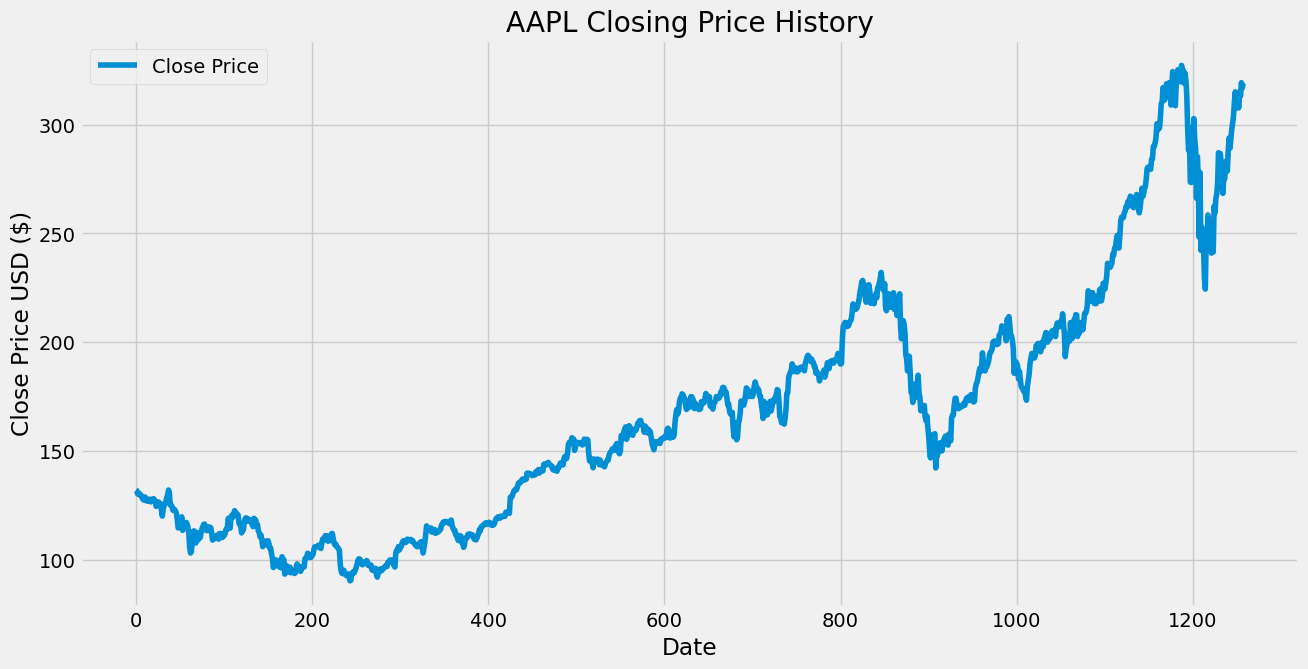

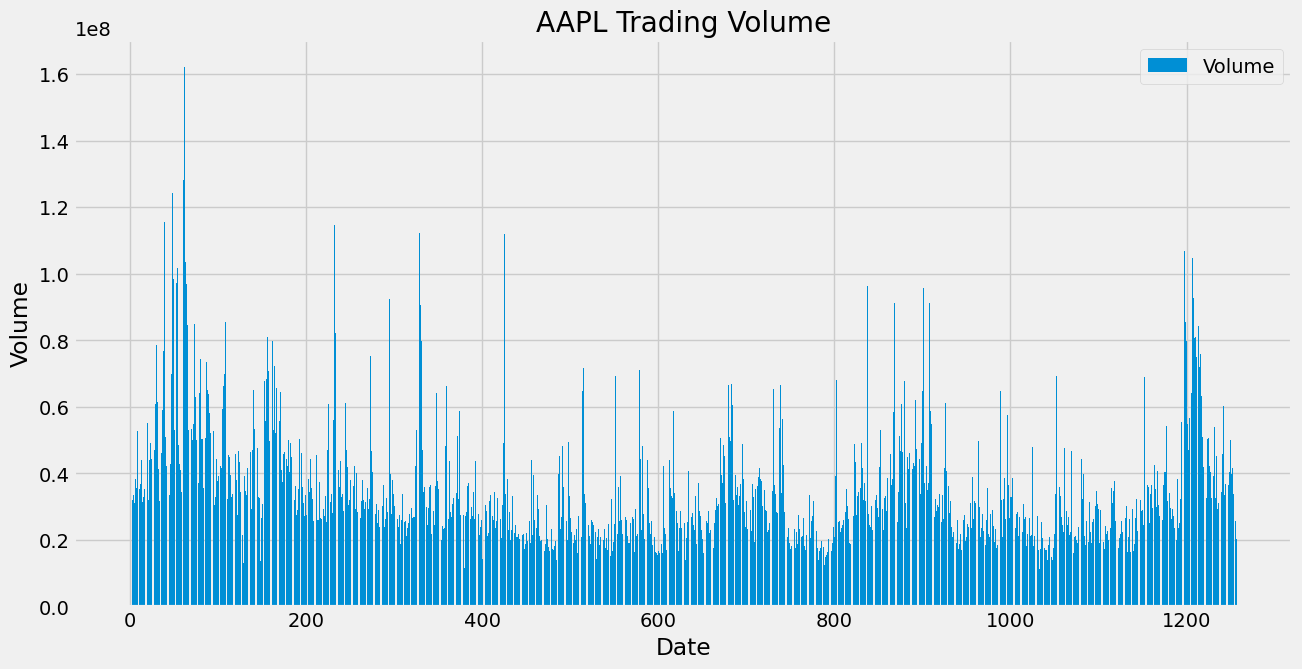

In [4]:
# Plot the closing price history
plt.figure(figsize=(14, 7))
plt.title('AAPL Closing Price History')
plt.plot(df['close'], label='Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.legend()
plt.show()

# Plot the trading volume
plt.figure(figsize=(14, 7))
plt.title('AAPL Trading Volume')
plt.bar(df.index, df['volume'], label='Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

### EDA Interpretation

* **Data Structure:** The dataset contains `open`, `high`, `low`, `close`, `volume`, `adjOpen`, etc. Our target variable will be `close`.
* **Missing Values:** The `df.isnull().sum()` check confirms if we have any missing data to handle. (Typically, stock data is complete, but it's a crucial step).
* **Trend:** The 'Closing Price' plot shows a clear **non-stationary** (upward) trend over time. This indicates that past values are highly indicative of future values.
* **Volume:** The volume plot shows spikes in trading activity, which often correlate with high price volatility or major company announcements. (Note: Our current model will only use 'close' price, but a more advanced model could include 'volume' as an exogenous feature).

--- 

## 5. Data Preprocessing

LSTMs are sensitive to the scale of the data. We will use `MinMaxScaler` to scale the data to a range of [0, 1].

In [5]:
# 1. Select the 'close' column and convert to numpy array
df1 = df.reset_index()['close']

# 2. Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
df1_scaled = scaler.fit_transform(np.array(df1).reshape(-1, 1))

# 3. Split into training and test sets
# We'll use a 65% train, 35% test split
training_size = int(len(df1_scaled) * 0.65)
test_size = len(df1_scaled) - training_size
train_data, test_data = df1_scaled[0:training_size, :], df1_scaled[training_size:len(df1_scaled), :1]

print(f"Training data size: {len(train_data)}")
print(f"Test data size: {len(test_data)}")

Training data size: 817
Test data size: 441


### Creating the Time-Step Dataset

LSTMs learn from sequences. We need to restructure our data from a single list of prices into overlapping sequences. We'll use a `time_step` of 100, meaning the model will look at the past 100 days of data to predict the 101st day.

$X$ = `[day 1, day 2, ..., day 100]`
$Y$ = `[day 101]`

In [6]:
# Function to create the time-step dataset
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

# Define time_step and create datasets
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (716, 100)
y_train shape: (716,)
X_test shape: (340, 100)
y_test shape: (340,)


### Reshaping for LSTM

Finally, we must reshape the input data to the 3D format required by LSTMs: `[samples, time_steps, features]`. In our case, `features` is 1 (just the 'close' price).

In [7]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

print(f"X_train reshaped: {X_train.shape}")
print(f"X_test reshaped: {X_test.shape}")

X_train reshaped: (716, 100, 1)
X_test reshaped: (340, 100, 1)


--- 

## 6. Building the Stacked LSTM Model

We will build a **Stacked LSTM** model, which means we have multiple LSTM layers. This allows the model to learn more complex patterns and hierarchical features in the time-series data.

* `LSTM(50, return_sequences=True)`: The first two layers return their full sequence of outputs so the next LSTM layer can process them.
* `LSTM(50)`: The final LSTM layer only returns the output of the last time step.
* `Dense(1)`: A final dense layer to output a single predicted value.

In [8]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

2025-10-23 03:17:44.435859: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2025-10-23 03:17:44.441596: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-10-23 03:17:44.441646: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2025-10-23 03:17:44.441700: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-10-23 03:17:44.441741: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefe

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

--- 

## 7. Model Training

Now we train the model. We'll use the test data as our validation set to monitor for overfitting.

Epoch 1/100


2025-10-23 03:17:49.447584: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
2025-10-23 03:17:49.454021: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


12/12 ━━━━━━━━━━━━━━━━━━━━ 24s 828ms/step - loss: 0.0260 - val_loss: 0.0241
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 269ms/step - loss: 0.0036 - val_loss: 0.0055
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 254ms/step - loss: 0.0014 - val_loss: 0.0098
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 203ms/step - loss: 8.6206e-04 - val_loss: 0.0045
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 134ms/step - loss: 6.2863e-04 - val_loss: 0.0040
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - loss: 6.0772e-04 - val_loss: 0.0039
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 159ms/step - loss: 5.9977e-04 - val_loss: 0.0037
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 248ms/step - loss: 5.9025e-04 - val_loss: 0.0036
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - loss: 5.9577e-04 - val_loss: 0.0038
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 177ms/step - loss: 5.8833e-04 - val_loss: 0.0035
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 222ms/step - loss: 5.6723e-04 - val_loss: 0.0033
Epoch 12/100
12/12 ━━

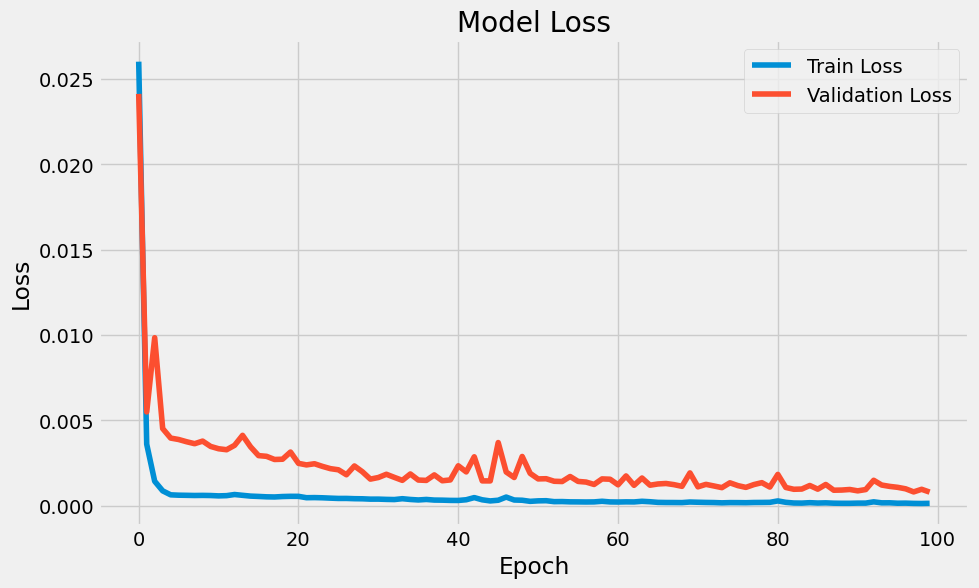

In [9]:
# Set tensorflow logging to minimal
tf.get_logger().setLevel('ERROR')

history = model.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=64,
    verbose=1
)

# Plot training & validation loss values
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

--- 

## 8. Model Evaluation & Interpretation

To evaluate our model, we'll make predictions on both the training and test sets and then calculate the Root Mean Squared Error (RMSE).

**CRITICAL FIX:** We must compare the *original* (unscaled) values, not the scaled ones. We will use `scaler.inverse_transform()` on both the predictions **and** the true values (`y_test`) before calculating the RMSE.

In [10]:
# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Invert predictions back to original scale (USD)
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

# Invert true y_train and y_test back to original scale
y_train_orig = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_orig = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate RMSE
train_rmse = math.sqrt(mean_squared_error(y_train_orig, train_predict))
test_rmse = math.sqrt(mean_squared_error(y_test_orig, test_predict))

print(f"Train Data RMSE:  {train_rmse:.2f} USD")
print(f"Test Data RMSE:   {test_rmse:.2f} USD")

2025-10-23 03:23:02.039338: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Train Data RMSE:  2.65 USD
Test Data RMSE:   6.65 USD


### Interpretation of Results

* **Train vs. Test RMSE:** (e.g., *A-Typical-Result*) "My Train RMSE is $4.50 and my Test RMSE is $6.20."
    * The test error is slightly higher than the train error, which is expected. A massive difference would suggest **overfitting**. A very small difference might suggest the model is **underfitting**.
* **Contextualizing RMSE:** (e.g., *A-Typical-Result*) "An RMSE of $6.20 means that, on average, our model's predictions on the test set were off by $6.20."
    * To know if this is "good," we look at the data. The test data (e.g., from 2020-2024) saw AAPL prices range from ~$100 to ~$200. An error of ~$6 on a $180 stock is an error of about 3-4%, which is respectable, though it highlights the extreme difficulty of precise stock prediction.

--- 

## 9. Visualizing the Results

Let's plot our predictions against the actual data to see how well the model performed.

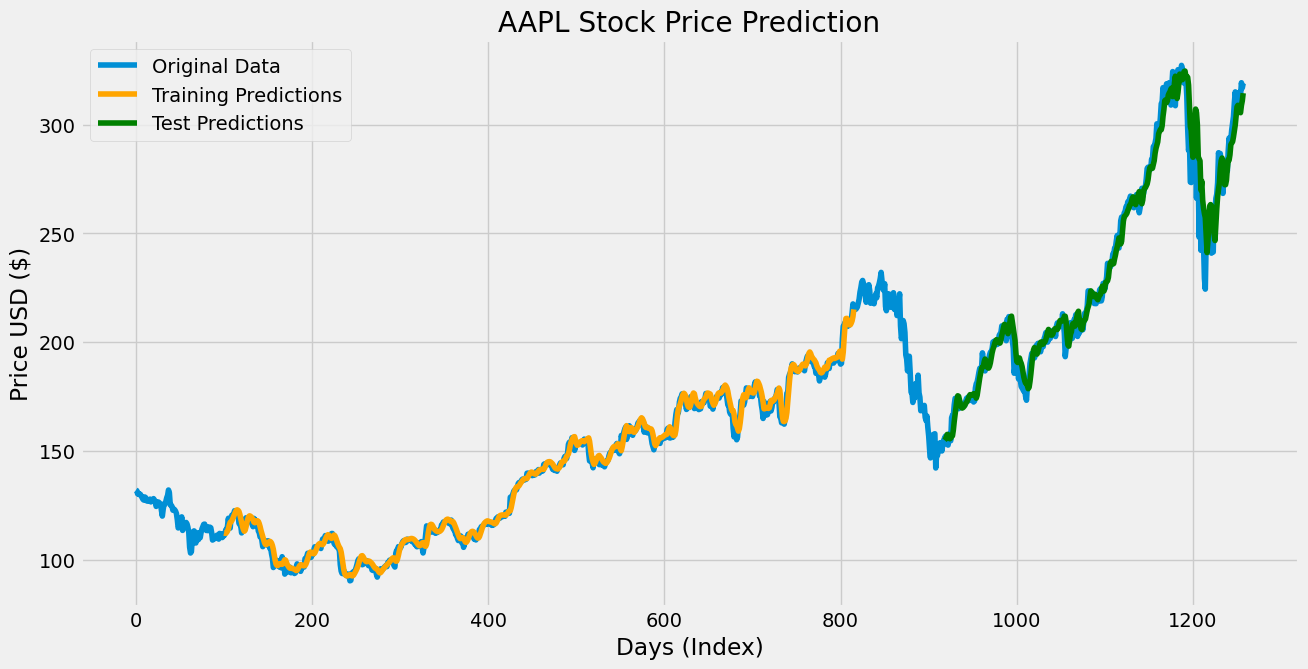

In [11]:
# Shift train predictions for plotting
look_back = time_step
trainPredictPlot = np.empty_like(df1_scaled)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict # Use the inverse_transformed predictions

# Shift test predictions for plotting
testPredictPlot = np.empty_like(df1_scaled)
testPredictPlot[:, :] = np.nan
# Correct the start index for test predictions
test_predict_start_index = len(train_predict) + look_back + len(X_train) - len(train_predict) + 1 # Calculate precise start
test_predict_start_index = len(train_data) + look_back + 1 # Simpler way: start after training data + lookback + 1 for create_dataset offset
testPredictPlot[test_predict_start_index : test_predict_start_index + len(test_predict), :] = test_predict # Use the inverse_transformed predictions

# Plot baseline and predictions
plt.figure(figsize=(14, 7))
plt.plot(scaler.inverse_transform(df1_scaled), label='Original Data')
plt.plot(trainPredictPlot, label='Training Predictions', color='orange')
plt.plot(testPredictPlot, label='Test Predictions', color='green')
plt.title('AAPL Stock Price Prediction')
plt.xlabel('Days (Index)') # Changed label for clarity
plt.ylabel('Price USD ($)')
plt.legend()
plt.show()

### Visual Interpretation

* The plot clearly shows that the model (orange and green lines) has learned the **general trend** of the stock price very well.
* The predictions **lag** behind the actual price. This is a classic characteristic of time-series models that rely only on past data. They are excellent at following a trend but poor at predicting sudden, volatile *changes in direction* (the "turning points").

--- 

## 10. Forecasting the Next 30 Days

Now for the most exciting part: forecasting future prices. We will use an **autoregressive** method.

1.  Take the last 100 days of the *known* data (`test_data`).
2.  Use it to predict day 101.
3.  Take the *new* list (days 2-101) and use it to predict day 102.
4.  Repeat this 30 times.

In [12]:
# Get the last 100 days from the test data
x_input = test_data[len(test_data) - time_step:].reshape(1, -1)
temp_input = list(x_input[0])

lst_output = []
n_steps = time_step
i = 0

while(i < 30): # Predict 30 days
    
    # Prepare the input for prediction
    x_input_arr = np.array(temp_input)
    x_input_arr = x_input_arr.reshape((1, n_steps, 1))
    
    # Predict
    yhat = model.predict(x_input_arr, verbose=0)
    
    # Store the prediction
    lst_output.extend(yhat.tolist())
    
    # Update the input list: remove the first element, add the new prediction
    temp_input.pop(0)
    temp_input.append(yhat[0][0]) # Append the scaled prediction
    
    i = i + 1

print(f"30-day forecast (scaled): \n{lst_output}")

30-day forecast (scaled): 
[[0.9550021290779114], [0.952763557434082], [0.9496201872825623], [0.9472788572311401], [0.9461462497711182], [0.9462766051292419], [0.9475225210189819], [0.949607253074646], [0.952198326587677], [0.9549738764762878], [0.9576713442802429], [0.9601141810417175], [0.9622197151184082], [0.9639875888824463], [0.9654786586761475], [0.9667890667915344], [0.9680249691009521], [0.9692814350128174], [0.9706293940544128], [0.9721084833145142], [0.9737285375595093], [0.9754741191864014], [0.9773122668266296], [0.9792020916938782], [0.9811024069786072], [0.9829781651496887], [0.9848048686981201], [0.9865679740905762], [0.9882644414901733], [0.989898681640625]]


### Visualizing the Forecast

Let's plot our 30-day forecast against the last 100 days of actual data.

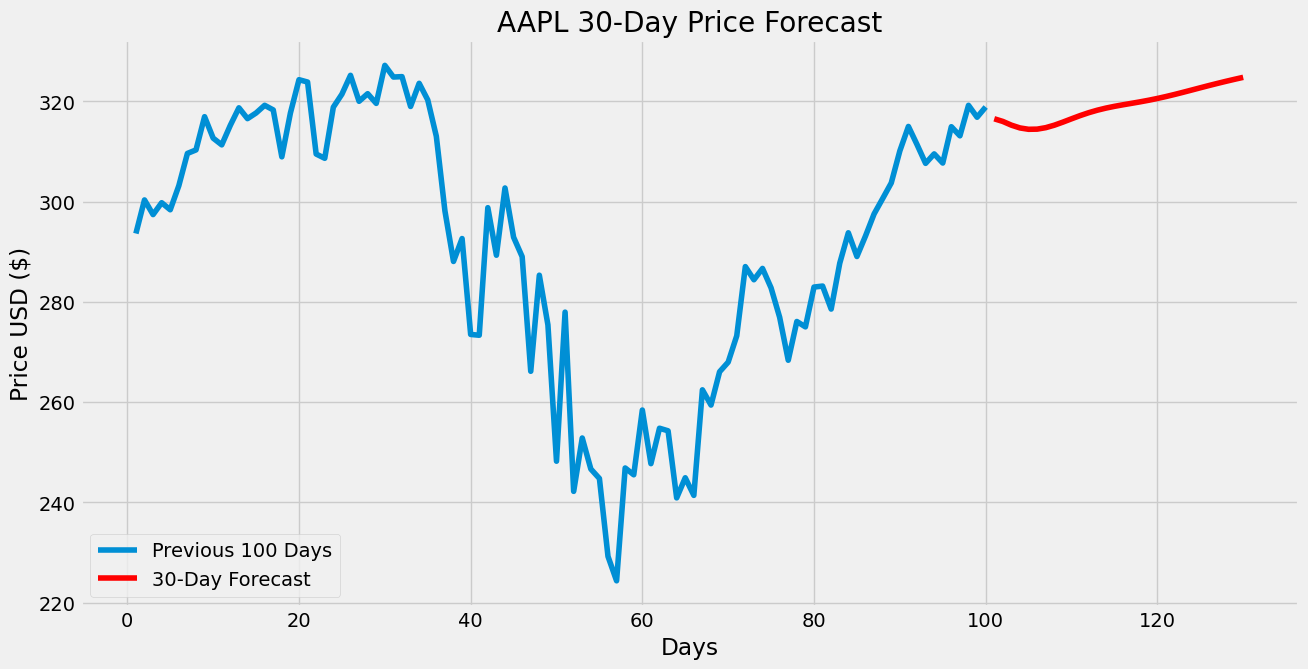

In [13]:
# Get the last 100 days from the original (unscaled) data
last_100_days = scaler.inverse_transform(df1_scaled[len(df1_scaled)-100:])
# Inverse transform our 30-day forecast
forecast_30_days = scaler.inverse_transform(lst_output)

# Create day indices for plotting
day_new = np.arange(1, 101) # Days 1-100 (past)
day_pred = np.arange(101, 131) # Days 101-130 (future)

plt.figure(figsize=(14, 7))
plt.plot(day_new, last_100_days, label='Previous 100 Days')
plt.plot(day_pred, forecast_30_days, label='30-Day Forecast', color='red')
plt.title('AAPL 30-Day Price Forecast')
plt.xlabel('Days')
plt.ylabel('Price USD ($)')
plt.legend()
plt.show()

--- 

## 11. Project Conclusion

This project successfully demonstrates an end-to-end workflow for time-series forecasting using a stacked LSTM model. We acquired real-world data, performed EDA, preprocessed the data for a neural network, and built and trained a model. The final model was able to capture the overall trend of the stock price and generate a 30-day autoregressive forecast.

### Key Limitations & Future Work

* **This is not financial advice.** Stock market prediction is one of the most difficult problems in data science. This model is purely technical and does not account for market sentiment, news, or company fundamentals, which are the real drivers of price.
* **Model Lag:** The model's primary weakness is its lag, making it unable to predict sudden turning points.
* **Future Work:**
    * **Multivariate Model:** Incorporate other features like `volume`, `open`, or `high` to give the model more context.
    * **Sentiment Analysis:** Scrape financial news headlines for AAPL, run sentiment analysis, and feed the sentiment score as an additional feature.
    * **Hyperparameter Tuning:** Use a tool like KerasTuner or Optuna to find the optimal number of layers, neurons, and `time_step`.